# CNN Visualization and Interpretation

This notebook demonstrates how to use the activated filters visualization functions to understand what features the CNN model learns at different layers.

In [1]:
import sys
from pathlib import Path
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Add parent directory to path
sys.path.append(str(Path.cwd().parent))

from interpret_cnn.utils import load_model, \
                                get_activated_filters, \
                                visualize_activated_filters, \
                                visualize_activated_filter_with_overlay, \
                                visualize_activated_filters_with_overlay, \
                                output_model_structure, \
                                visualize_activation_maximization, \
                                calc_cam, \
                                visualize_cam, \
                                calc_gradcam, \
                                visualize_gradcam, \
                                calc_saliency_maps, \
                                visualize_saliency_maps, \
                                visualize_activation_maps

In [2]:
# Load the trained model
model_path = "../detection_car/models/model_20251006_172724/cnn_best.pth"
model = load_model(model_path)

# Display model structure
output_model_structure(model)

Model loaded successfully from ../detection_car/models/model_20251006_172724/cnn_best.pth
=== Model Structure ===
Total parameters: 1,604,449
- features[0].Conv2d: Conv2d {'in_channels': 3, 'out_channels': 32, 'kernel_size': (3, 3), 'stride': (1, 1), 'padding': (1, 1)}
- features[1].BatchNorm2d: BatchNorm2d {'num_features': 32}
- features[2].ReLU: ReLU {}
- features[3].MaxPool2d: MaxPool2d {'kernel_size': (2, 2), 'stride': (2, 2)}
- features[4].Conv2d: Conv2d {'in_channels': 32, 'out_channels': 64, 'kernel_size': (3, 3), 'stride': (1, 1), 'padding': (1, 1)}
- features[5].BatchNorm2d: BatchNorm2d {'num_features': 64}
- features[6].ReLU: ReLU {}
- features[7].MaxPool2d: MaxPool2d {'kernel_size': (2, 2), 'stride': (2, 2)}
- features[8].Conv2d: Conv2d {'in_channels': 64, 'out_channels': 128, 'kernel_size': (3, 3), 'stride': (1, 1), 'padding': (1, 1)}
- features[9].BatchNorm2d: BatchNorm2d {'num_features': 128}
- features[10].ReLU: ReLU {}
- features[11].MaxPool2d: MaxPool2d {'kernel_size':

{'layers': [{'name': 'features[0].Conv2d',
   'type': 'Conv2d',
   'in_channels': 3,
   'out_channels': 32,
   'kernel_size': (3, 3),
   'stride': (1, 1),
   'padding': (1, 1)},
  {'name': 'features[1].BatchNorm2d',
   'type': 'BatchNorm2d',
   'num_features': 32},
  {'name': 'features[2].ReLU', 'type': 'ReLU'},
  {'name': 'features[3].MaxPool2d',
   'type': 'MaxPool2d',
   'kernel_size': (2, 2),
   'stride': (2, 2)},
  {'name': 'features[4].Conv2d',
   'type': 'Conv2d',
   'in_channels': 32,
   'out_channels': 64,
   'kernel_size': (3, 3),
   'stride': (1, 1),
   'padding': (1, 1)},
  {'name': 'features[5].BatchNorm2d',
   'type': 'BatchNorm2d',
   'num_features': 64},
  {'name': 'features[6].ReLU', 'type': 'ReLU'},
  {'name': 'features[7].MaxPool2d',
   'type': 'MaxPool2d',
   'kernel_size': (2, 2),
   'stride': (2, 2)},
  {'name': 'features[8].Conv2d',
   'type': 'Conv2d',
   'in_channels': 64,
   'out_channels': 128,
   'kernel_size': (3, 3),
   'stride': (1, 1),
   'padding': (1, 

In [ ]:
# Load a sample image
image = cv2.imread("/Users/wjs/Library/CloudStorage/OneDrive-Personal/Coding, ML & DL/ResponsibleAI/cardd_data/test_results/edited_1759739665412_6862.png")
image = cv2.resize(image, (512, 512))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = torch.from_numpy(image).float()

print(f"Input image shape: {image.shape}")
print("Created test image with squares and diagonal patterns")

Input image shape: torch.Size([224, 224, 3])
Created test image with squares and diagonal patterns


## Activated Filters

Activated filters shape: torch.Size([64, 112, 112])
Number of filters: 64
Feature map size: 112x112


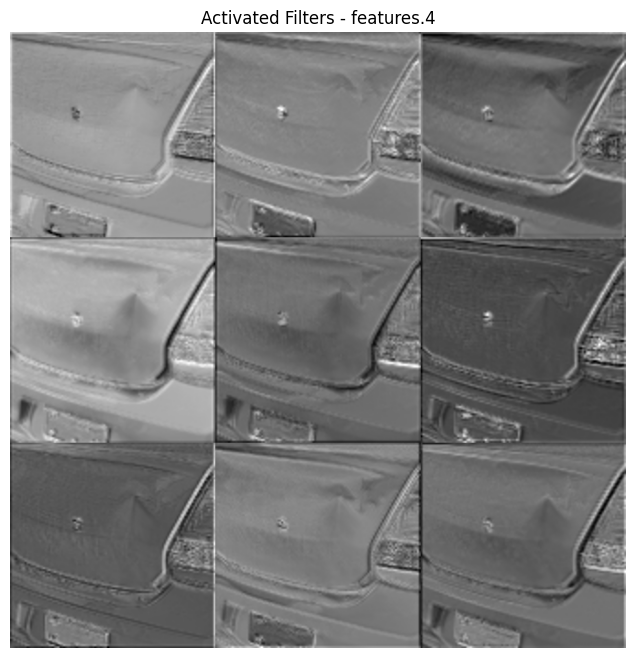

In [4]:
# Extract activated filters from the first convolutional layer
layer_name = "features.4"  # First conv layer
activations = get_activated_filters(model, image, layer_name)

print(f"Activated filters shape: {activations.shape}")
print(f"Number of filters: {activations.shape[0]}")
print(f"Feature map size: {activations.shape[1]}x{activations.shape[2]}")

# Visualize the activated filters
vis_img = visualize_activated_filters(model, image, layer_name, num_cols=3)

# Display the visualization
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.title(f'Activated Filters - {layer_name}')
plt.axis('off')
plt.show()


=== Visualizing features.16 ===
Activations shape: torch.Size([512, 14, 14])


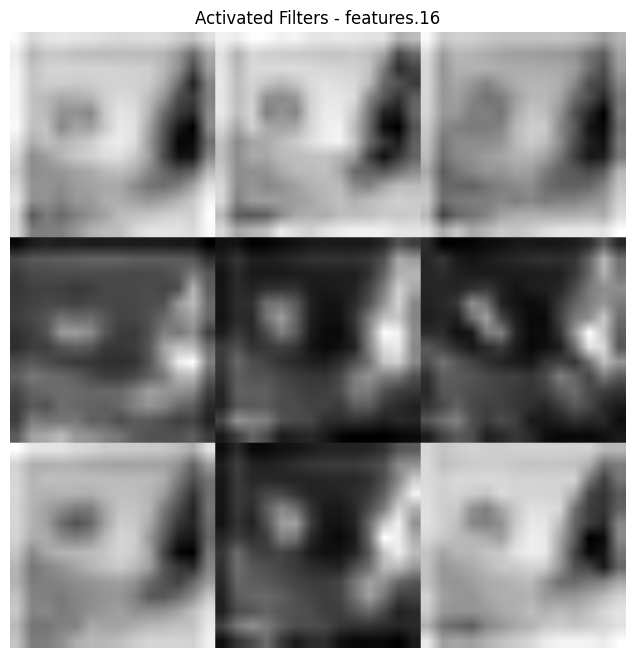

Mean activation per filter: [ 1.38304535e+02  1.56329285e+02 -3.43873329e+01 -1.75219784e+01
 -3.73201370e+01  1.31310699e+02  1.53776733e+02  1.37401260e+02
  1.24377029e+02 -6.04327431e+01 -8.90176163e+01 -5.87508965e+01
  1.19658882e+02  1.01873703e+02  1.66951950e+02 -1.45274796e+02
  9.24635773e+01  1.80406052e+02 -9.12145844e+01 -9.98575134e+01
 -1.81892242e+02  1.35844849e+02 -2.15070618e+02  1.04027969e+02
  1.24484703e+02 -2.90400124e+01 -1.69275543e+02  1.79583389e+02
 -1.48493973e+02  1.02386780e+02 -7.62402267e+01 -9.03918533e+01
 -8.96481476e+01 -1.71709915e+02  9.68996048e+01 -1.56802170e+02
 -4.12105103e+01 -1.80205643e+02 -5.00566711e+01 -1.64947372e+02
  1.21781601e+02  1.62176285e+02  1.28471329e+02 -1.67956818e+02
 -1.05170250e+02 -1.59701828e+02 -9.30901260e+01  2.43427677e+01
 -8.08348846e+01 -3.68142052e+01  1.79886261e+02  1.19595757e+02
  1.66504150e+02 -1.69387894e+02  7.39273643e+00  1.66498876e+00
  4.67513895e+00  1.33100937e+02  1.27925171e+02 -7.75520401e+

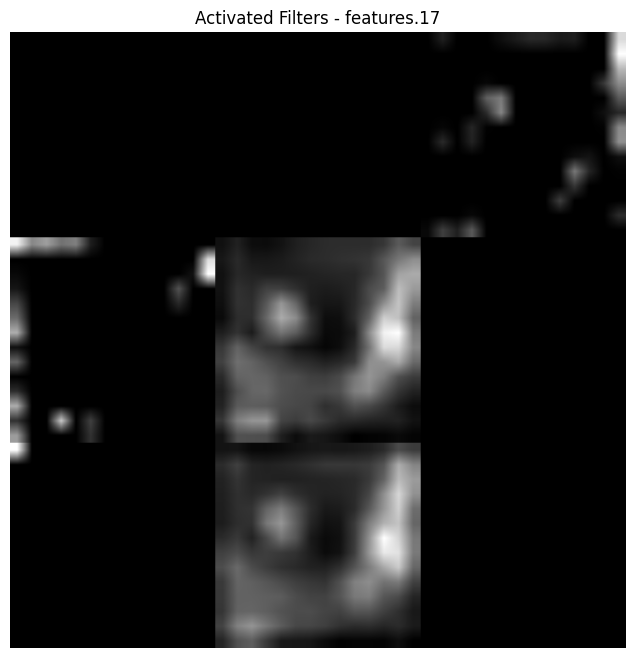

Mean activation per filter: [1.04531479e+02 1.25018517e+02 1.66988206e+00 9.16825354e-01
 4.01701361e-01 9.97161713e+01 1.12165436e+02 1.06229424e+02
 1.01403801e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.15496773e+02 7.88514023e+01 1.15476494e+02 0.00000000e+00
 9.87426071e+01 1.35810684e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.08130638e+02 0.00000000e+00 9.53187180e+01
 9.55099030e+01 2.15786919e-01 0.00000000e+00 1.27021057e+02
 0.00000000e+00 1.03936829e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.95824127e+01 0.00000000e+00
 1.47178993e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.17439949e+02 1.31887878e+02 1.21892685e+02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.97483959e+01
 4.84692045e-02 4.29456085e-01 1.32959900e+02 9.68204422e+01
 1.15957085e+02 0.00000000e+00 1.30955439e+01 1.12712364e+01
 9.78201008e+00 1.05632347e+02 1.03359985e+02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.16914841e+02 0.00000000e

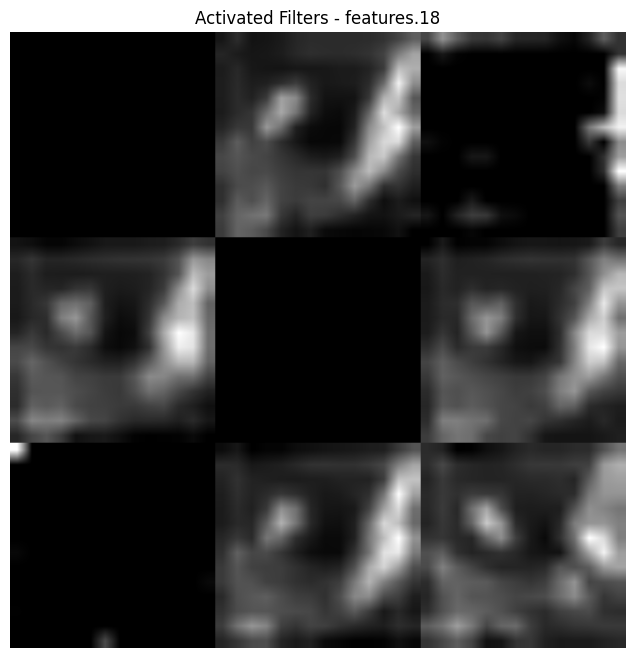

Mean activation per filter: [1.04531479e+02 1.25018517e+02 1.66988206e+00 9.16825354e-01
 4.01701361e-01 9.97161713e+01 1.12165436e+02 1.06229424e+02
 1.01403801e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.15496773e+02 7.88514023e+01 1.15476494e+02 0.00000000e+00
 9.87426071e+01 1.35810684e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.08130638e+02 0.00000000e+00 9.53187180e+01
 9.55099030e+01 2.15786919e-01 0.00000000e+00 1.27021057e+02
 0.00000000e+00 1.03936829e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.95824127e+01 0.00000000e+00
 1.47178993e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.17439949e+02 1.31887878e+02 1.21892685e+02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.97483959e+01
 4.84692045e-02 4.29456085e-01 1.32959900e+02 9.68204422e+01
 1.15957085e+02 0.00000000e+00 1.30955439e+01 1.12712364e+01
 9.78201008e+00 1.05632347e+02 1.03359985e+02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.16914841e+02 0.00000000e

In [5]:
# Visualize activated filters for multiple layers
layers_to_visualize = ["features.16","features.17","features.18"]

for layer_name in layers_to_visualize:
    print(f"\n=== Visualizing {layer_name} ===")
    
    # Get activations
    activations = get_activated_filters(model, image, layer_name)
    print(f"Activations shape: {activations.shape}")
    
    # Visualize all filters in a grid
    vis_img = visualize_activated_filters(model, image, layer_name, num_cols=3)
    
    # Display
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Activated Filters - {layer_name}')
    plt.axis('off')
    plt.show()
    
    # Show individual filter statistics
    print(f"Mean activation per filter: {activations.mean(dim=[1,2]).cpu().numpy()}")
    print(f"Max activation per filter: {activations.flatten(1).max(dim=1)[0].cpu().numpy()}")

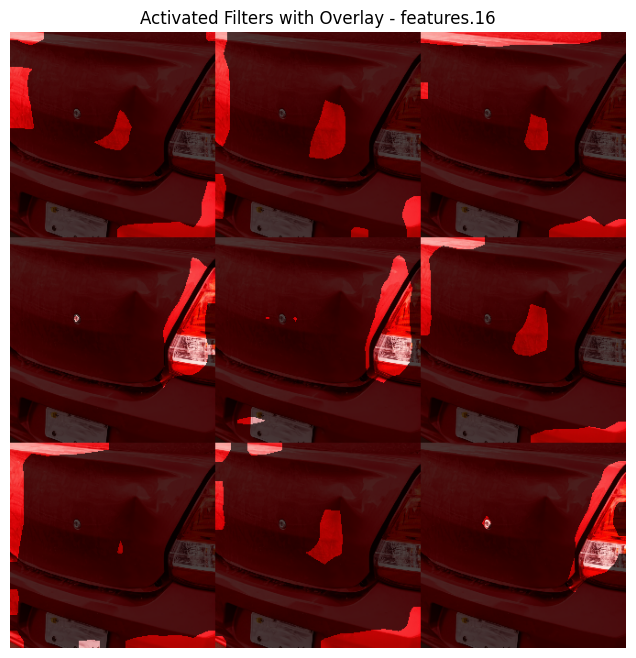

Red areas show where each filter has its top 1% highest activations


In [26]:
# Visualize activated filters with overlay on input image
layer_name = "features.16"  # First conv layer

# Visualize the activated filters with red overlay highlighting top 10% activations
overlay_img = visualize_activated_filters_with_overlay(model, image, layer_name, num_cols=3, percent_threshold=10)

# Display the overlay visualization
plt.figure(figsize=(12, 8))
plt.imshow(overlay_img)
plt.title(f'Activated Filters with Overlay - {layer_name}')
plt.axis('off')
plt.show()

print("Red areas show where each filter has its top 1% highest activations")

## Activation Maximization

.4f


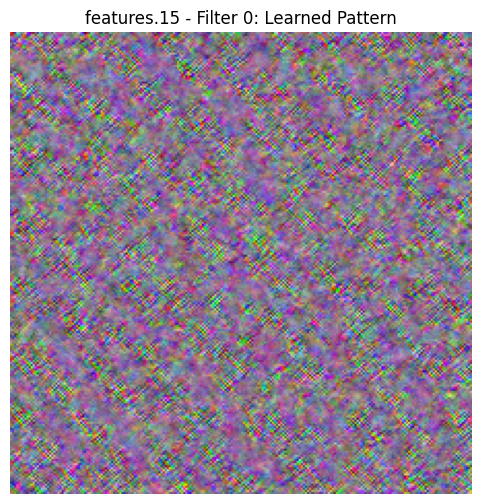

In [27]:
# Maximize filter 0 in first conv layer
layer_name = "features.15"
filter_idx = 0
max_img = visualize_activation_maximization(model, layer_name, filter_idx=filter_idx, iterations=50)
plt.figure(figsize=(6, 6))
plt.imshow(max_img)
plt.title(f'{layer_name} - Filter {filter_idx}: Learned Pattern')
plt.axis('off')
plt.show()

.4f
.4f
.4f
.4f
.4f
.4f


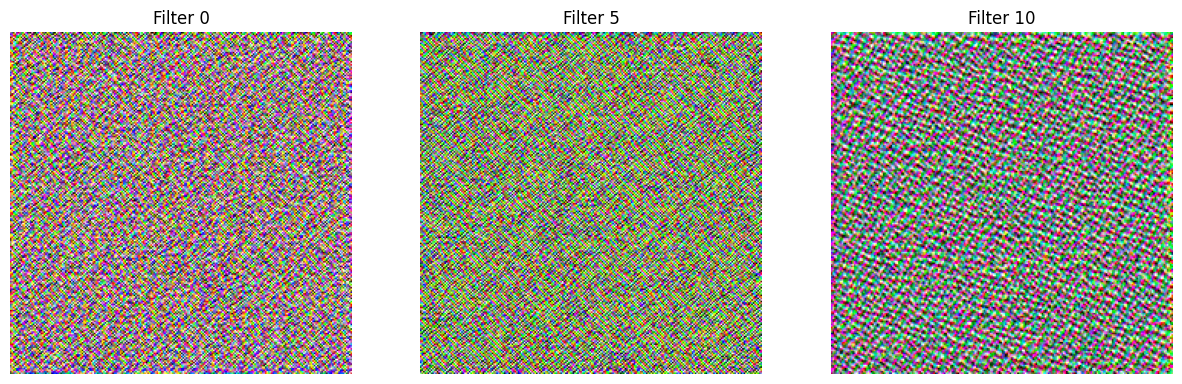

In [28]:
# Compare what different filters have learned
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
layer_name = "features.10"
filters_to_show = [0, 5, 10]  # Pick interesting filters

for i, filter_idx in enumerate(filters_to_show):
    max_img = visualize_activation_maximization(model, layer_name, filter_idx=filter_idx, iterations=100)
    axes[i].imshow(max_img)
    axes[i].set_title(f'Filter {filter_idx}')
    axes[i].axis('off')
plt.show()

.4f
.4f
.4f
.4f
.4f
.4f


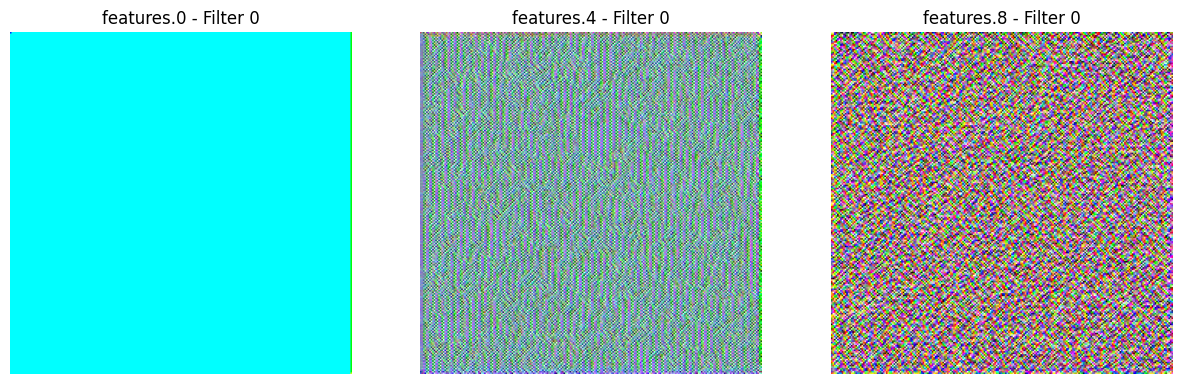

In [29]:
# Compare same filter across different layers
layers = ["features.0", "features.4", "features.8"]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, layer in enumerate(layers):
    max_img = visualize_activation_maximization(model, layer, filter_idx=0, iterations=100)
    axes[i].imshow(max_img)
    axes[i].set_title(f'{layer} - Filter 0')
    axes[i].axis('off')
plt.show()

.4f
.4f


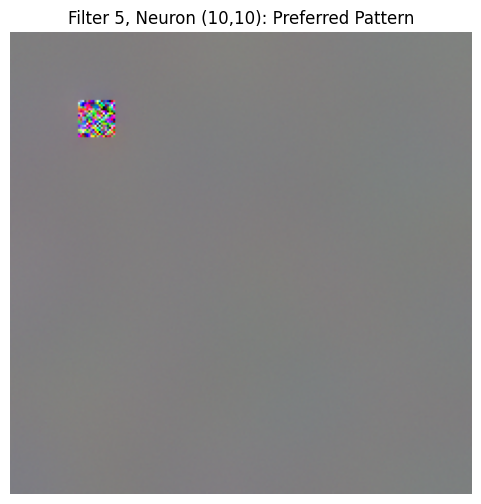

In [30]:
# Maximize activation of a specific neuron position
max_neuron = visualize_activation_maximization(
    model, "features.10", filter_idx=5, neuron_idx=(10, 10), iterations=100
)
plt.figure(figsize=(6, 6))
plt.imshow(max_neuron)
plt.title('Filter 5, Neuron (10,10): Preferred Pattern')
plt.axis('off')
plt.show()

## CAM, Grad-CAM and Variants

=== Computing Class Activation Map ===
CAM heatmap shape: torch.Size([14, 14])


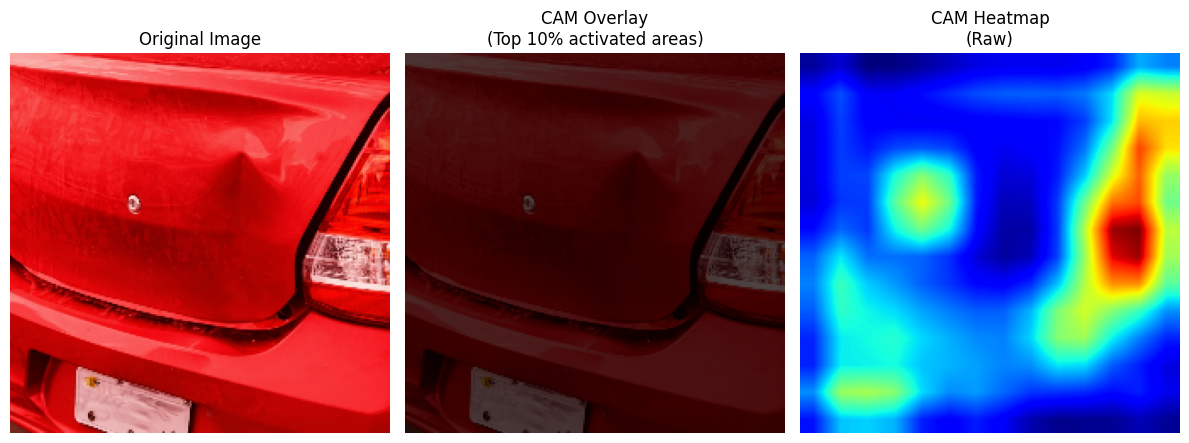

In [9]:
# Calculate and visualize CAM
print("=== Computing Class Activation Map ===")
cam_heatmap = calc_cam(model, image)

print(f"CAM heatmap shape: {cam_heatmap.shape}")

# Visualize CAM as overlay (top 10% most activated areas shown clearly, others darkened)
cam_visualization = visualize_cam(model, image, percent_threshold=10)

# Display the CAM visualization
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image.numpy().astype(np.uint8) if isinstance(image, torch.Tensor) else image.astype(np.uint8))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cam_visualization)
plt.title('CAM Overlay\n(Top 10% activated areas)')
plt.axis('off')

# Show raw CAM heatmap for comparison
plt.subplot(1, 3, 3)
cam_resized = cv2.resize(cam_heatmap.detach().cpu().numpy(), (224, 224), interpolation=cv2.INTER_LINEAR)
plt.imshow(cam_resized, cmap='jet')
plt.title('CAM Heatmap\n(Raw)')
plt.axis('off')

plt.tight_layout()
plt.show()

\n=== Computing Visualizations ===


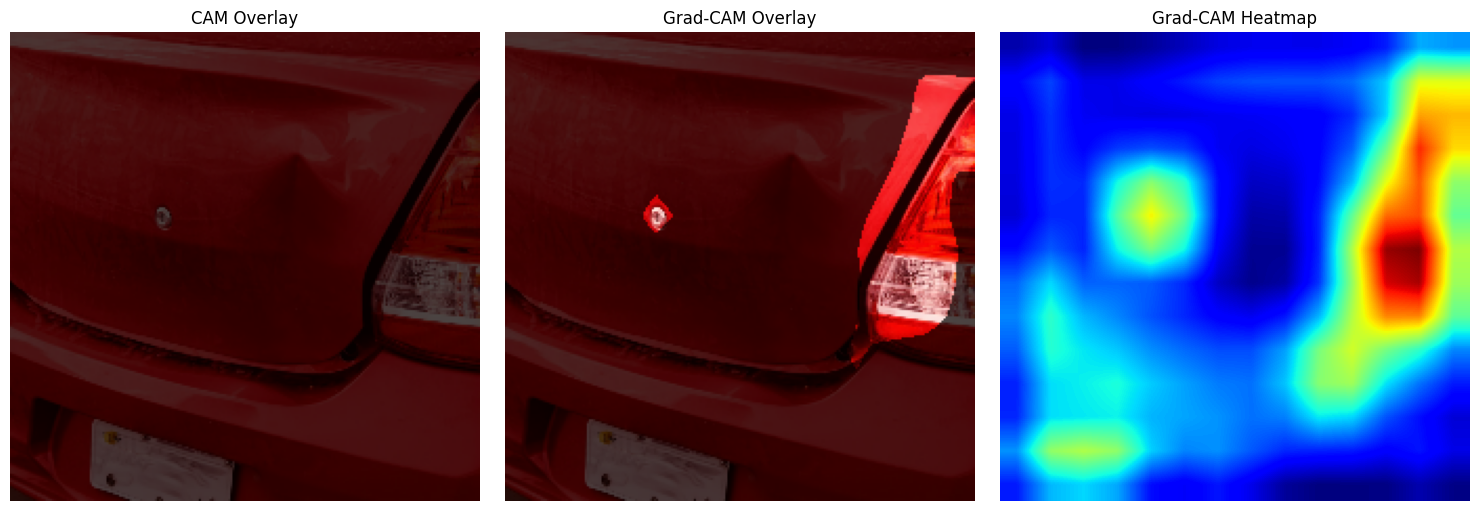

In [10]:
# ## CAM and Grad-CAM Visualization
print("\\n=== Computing Visualizations ===")

# Calculate CAM Overlay
cam_overlay = visualize_cam(model, image, percent_threshold=10)

# Calculate Grad-CAM Overlay
gradcam_overlay = visualize_gradcam(model, image, percent_threshold=10)

# Calculate Grad-CAM heatmap
gradcam_raw = calc_gradcam(model, image,)
gradcam_heatmap = cv2.resize(gradcam_raw.detach().cpu().numpy(), (224, 224), interpolation=cv2.INTER_LINEAR)

# Display the three visualizations
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cam_overlay)
plt.title('CAM Overlay')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gradcam_overlay)
plt.title('Grad-CAM Overlay')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradcam_heatmap, cmap='jet')
plt.title('Grad-CAM Heatmap')
plt.axis('off')

plt.tight_layout()
plt.show()

## Saliency Maps: Pixel-Level Interpretability
Grad-map: Gradient on feature map, then projected to input image
Saliency map: Gradient on input pixel directly

=== Computing Saliency Maps ===
Saliency map shape: torch.Size([224, 224])


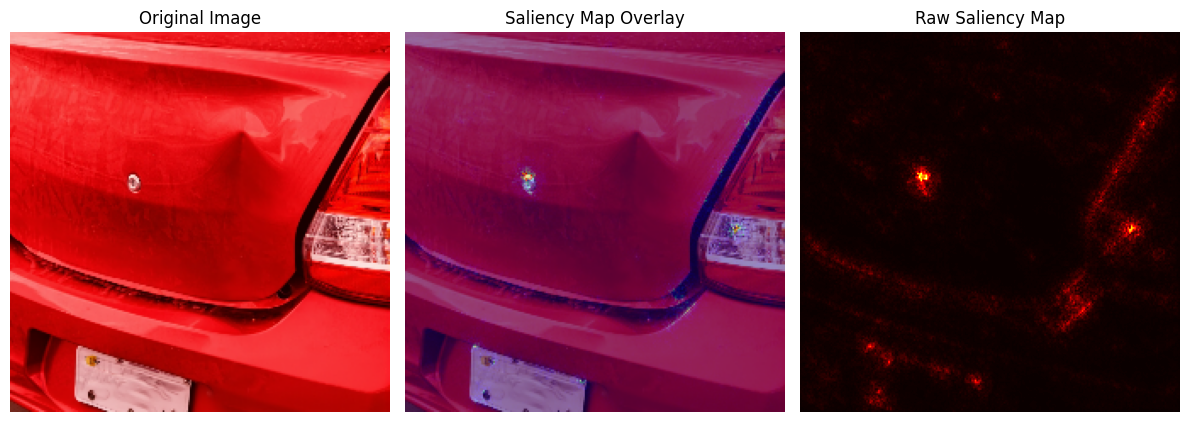

In [11]:
# Calculate and visualize Saliency Maps
print("=== Computing Saliency Maps ===")

# Calculate saliency map
saliency_map = calc_saliency_maps(model, image)
print(f"Saliency map shape: {saliency_map.shape}")

# Visualize saliency map as overlay
saliency_overlay = visualize_saliency_maps(model, image)

# Display saliency map visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(image.numpy().astype(np.uint8) if isinstance(image, torch.Tensor) else image.astype(np.uint8))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(saliency_overlay)
plt.title('Saliency Map Overlay')
plt.axis('off')

plt.subplot(1, 3, 3)
# Show raw saliency map
saliency_raw = saliency_map.detach().cpu().numpy()
saliency_normalized = (saliency_raw - saliency_raw.min()) / (saliency_raw.max() - saliency_raw.min() + 1e-8)
plt.imshow(saliency_normalized, cmap='hot')
plt.title('Raw Saliency Map')
plt.axis('off')

plt.tight_layout()
plt.show()

## Network Dissect and Activation Maps


=== Visualizing Activation Maps ===
Layer: features.17
Filter index: 15
Activation threshold: 1%
Sample images from: ../cardd_data/GenAI_results/SD2/CarDD-TR/
Sampling 16 images from 3187 available images
Creating 4x4 grid for filter 15 in layer 'features.17'
Using 1% activation threshold for overlay visualization
Successfully created activation overlay grid with shape: (896, 896, 3)


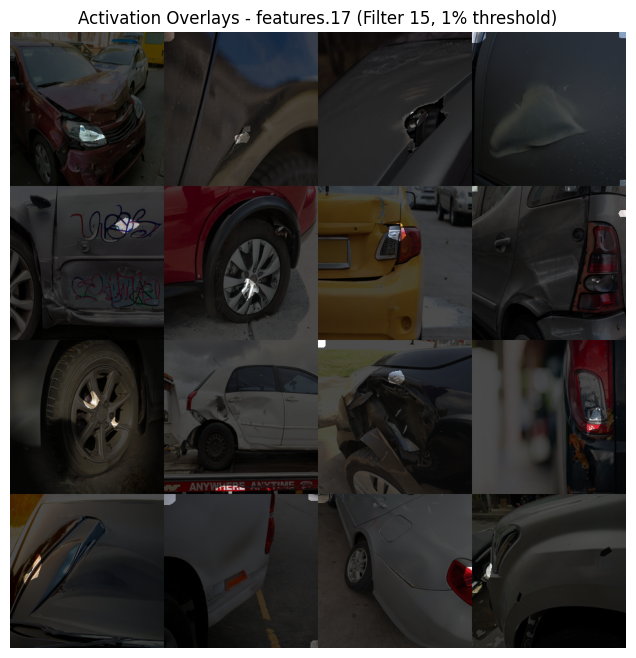

Grid shape: (896, 896, 3)


In [25]:
# Visualize activation maps for multiple images from a sample folder
sample_image_folder = "../cardd_data/GenAI_results/SD2/CarDD-TR/"  # Path to folder with sample images
layer_name = "features.17"  # Layer to visualize (first conv layer)
filter_idx = 15  # Which filter to visualize (0 = first filter)
percent_threshold = 1  # Top 1% of activations to highlight

print(f"\n=== Visualizing Activation Maps ===")
print(f"Layer: {layer_name}")
print(f"Filter index: {filter_idx}")
print(f"Activation threshold: {percent_threshold}%")
print(f"Sample images from: {sample_image_folder}")

# Generate activation overlay grid
activation_grid = visualize_activation_maps(model, sample_image_folder, layer_name, filter_idx, percent_threshold)

# Display the activation overlay grid
plt.figure(figsize=(8, 8))
plt.imshow(activation_grid)
plt.title(f'Activation Overlays - {layer_name} (Filter {filter_idx}, {percent_threshold}% threshold)')
plt.axis('off')
plt.show()

print(f"Grid shape: {activation_grid.shape}")